<a href="https://colab.research.google.com/github/Rainisha-varma/CropPricePrediction/blob/main/CropPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!wget "https://drive.google.com/uc?id=12jYaFH0d_XhnWGTxcBWmQAcl0jcIR5a_" -O Dataset.csv

--2025-07-23 08:55:50--  https://drive.google.com/uc?id=12jYaFH0d_XhnWGTxcBWmQAcl0jcIR5a_
Resolving drive.google.com (drive.google.com)... 192.178.219.138, 192.178.219.102, 192.178.219.139, ...
Connecting to drive.google.com (drive.google.com)|192.178.219.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12jYaFH0d_XhnWGTxcBWmQAcl0jcIR5a_ [following]
--2025-07-23 08:55:50--  https://drive.usercontent.google.com/download?id=12jYaFH0d_XhnWGTxcBWmQAcl0jcIR5a_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.219.132, 2607:f8b0:400c:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.219.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18141 (18K) [application/octet-stream]
Saving to: ‘Dataset.csv’

Dataset.csv         100%[===================>]  17.72K  --.-KB/s    in 0s      

2025-07-23 08:55:51 (98.9 MB/s)

In [32]:
!ls


Dataset.csv  sample_data


In [33]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset (assuming it's in a CSV format, adjust accordingly)
df = pd.read_csv('Dataset.csv')

# Step 1: Organize the data for easier calculations
df_melt = df.melt(id_vars=['Commodity', 'Year'],
                  value_vars=['Jan', 'Feb', 'Mar', 'April', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                  var_name='Month', value_name='Price')


# Step 2: Calculate Z-score by grouping data by 'Commodity' and applying zscore function
df_melt['Z-score'] = df_melt.groupby('Commodity')['Price'].transform(zscore)

# Step 3: Drop the 'Price' column
zonly = df_melt.drop(columns=['Price'])

# Step 4: Save the result to a new CSV file
zonly.to_csv('normalized_data.csv', index=False)

# Print confirmation message
#print("Z-scores have been saved to 'normalized_data.csv'")


In [34]:
!ls


Dataset.csv  normalized_data.csv  sample_data


In [35]:
# Identify outliers where Z-score is beyond a threshold (e.g., >3 or <-3)
outliers = df_melt[(df_melt['Z-score'] > 3) | (df_melt['Z-score'] < -3)]
print(outliers)


     Commodity  Year Month   Price   Z-score
382        Gur  2021   Feb   58.97  3.484547
1410    Tomato  2023  July  106.57  5.711538
1620    Tomato  2023   Aug   96.38  4.954672
1638     Sugar  2015   Aug   26.00 -3.326256
1813    Potato  2020   Sep   40.98  3.007498
1848     Sugar  2015   Sep   26.43 -3.207185
1907  Gram Dal  2016   Oct  128.33  3.756867
2023    Potato  2020   Oct   42.69  3.312430
2117  Gram Dal  2016   Nov  132.01  4.002393
2233    Potato  2020   Nov   45.61  3.833132
2327  Gram Dal  2016   Dec  127.92  3.729512
2443    Potato  2020   Dec   41.18  3.043163
2454     Onion  2019   Dec   86.35  5.120083


In [36]:
# Cap Z-scores beyond 3 or -3
df_melt['Z-score'] = df_melt['Z-score'].apply(lambda x: 3 if x > 3 else (-3 if x < -3 else x))


In [37]:
# Identify outliers where Z-score is beyond a threshold (e.g., >3 or <-3)
outliers = df_melt[(df_melt['Z-score'] > 3) | (df_melt['Z-score'] < -3)]
print(outliers)

Empty DataFrame
Columns: [Commodity, Year, Month, Price, Z-score]
Index: []


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 4: One-hot encode categorical columns ('Commodity', 'Month')
df_melt_encoded = pd.get_dummies(df_melt, columns=['Commodity', 'Month'], drop_first=True)

# Step 5: Use Z-scores as features (X) and Price as target (y)
X = df_melt_encoded.drop(columns=['Price', 'Z-score'])  # Use Z-score instead of raw prices
X['Z-score'] = df_melt['Z-score']  # Include Z-score as a feature
Y = df_melt_encoded['Price']  # Target remains the actual price

#X['Year'] = df_melt['Year']

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Step 8: Predict on the test set
y_pred = model.predict(X_test)

In [41]:
import numpy as np

# Step 1: Make predictions on the training set
y_train_pred = model.predict(X_train)

# Step 2: Calculate Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Step 3: Calculate Root Mean Squared Error (RMSE) for the training set
rmse_train = np.sqrt(mse_train)

# Step 4: Print the RMSE
print(f"Training RMSE: {rmse_train}")


Training RMSE: 9.967988331956207


In [14]:
# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 10.53681324158953


In [15]:
import pandas as pd

# Step 1: Prepare your input features
# Replace these with actual values you want to predict
new_data = {
    'Month_April': [1],  # Example: April = 1, other months = 0
    #'Month_Aug': [0],    # Example: Aug = 0
    #'Month_Dec': [0],    # Example: Dec = 0
    #'Month_Feb': [0],    # Example: Feb = 0
    #'Month_Jan': [0],    # Example: Jan = 0
    #'Month_July': [0],   # Example: July = 0
    #'Month_Jun': [0],    # Example: Jun = 0
    #'Month_Mar': [0],    # Example: Mar = 0
    #'Month_May': [0],    # Example: May = 0
    #'Month_Nov': [0],    # Example: Nov = 0
    #'Month_Oct': [0],    # Example: Oct = 0
    #'Month_Sep': [0],    # Example: Sep = 0
    #'Commodity_Masoor Dal': [0],  # Example: Commodity_X = 1 if it's a relevant commodity, otherwise 0
    'Commodity_Groundnut Oil': [1],  # Example: Commodity_Y = 0
    # Add or remove commodity columns as necessary
    'Year': [2025]       # Example year
}

# Step 2: Create a DataFrame
new_df = pd.DataFrame(new_data)

# Ensure the DataFrame has the same columns as the training data
# For example, you may need to reorder columns or ensure all columns are present
for col in X.columns:
    if col not in new_df.columns:
        new_df[col] = 0  # Or appropriate default value
new_df = new_df[X.columns]  # Reorder columns if necessary

# Step 3: Get predictions
y_new_pred = model.predict(new_df)

print(f"Predicted Price: {y_new_pred[0]}")


Predicted Price: 140.97899235597737


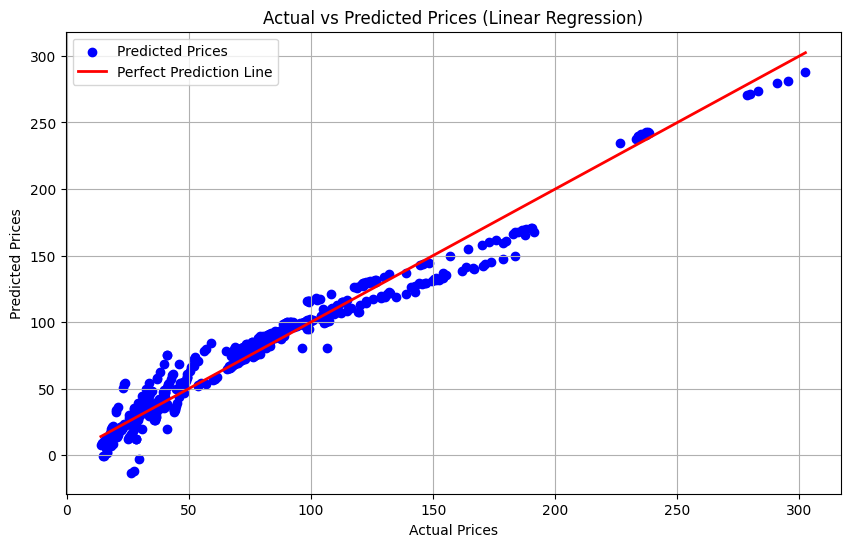

In [16]:
import matplotlib.pyplot as plt

# Step 1: Plot the Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')

# Step 2: Plot the line where the prediction perfectly matches the actual prices
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')

# Step 3: Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.legend()
plt.grid(True)

# Step 4: Show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your actual and predicted values, respectively.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


R-squared (R2): 0.9677019428395274


In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
import numpy as np

# Step 1: Define the parameter grid for random search
param_dist = {
    'C': loguniform(1e-3, 1e3),  # Log-uniform distribution for 'C' (penalty parameter)
    'epsilon': uniform(0.01, 0.1),  # Uniform distribution for epsilon
    'gamma': ['scale', 'auto']  # 'scale' or 'auto' for gamma (kernel coefficient)
}

# Step 2: Initialize the SVR model with RBF kernel (default)
svr = SVR(kernel='rbf')

# Step 3: Set up the RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    svr,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Display progress
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

In [18]:
# Step 4: Fit the model to the training data
random_search.fit(X_train, y_train)

# Step 5: Print the best hyperparameters found
print("Best hyperparameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found:  {'C': np.float64(695.8780103230359), 'epsilon': np.float64(0.033277134043030426), 'gamma': 'auto'}


In [19]:
y_pred_new = random_search.predict(X_test)

In [20]:
y_train_pred = random_search.predict(X_train)

In [21]:
# Step 7: Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {rmse1}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_new))
print(f"Test RMSE: {rmse}")

Training RMSE: 0.692175795705606
Test RMSE: 1.9883364241586872


In [24]:
from sklearn.metrics import r2_score
# y_test and y_pred_new are actual and predicted values, respectively.
r2_p = r2_score(y_test, y_pred_new)
print(f"R-squared (R2): {r2_p}")

R-squared (R2): 0.9988498947907343


In [25]:
import pandas as pd

# Step 1: Prepare your input features
# Replace these with actual values you want to predict
new_data = {
    'Month_April': [0],  # Example: April = 1, other months = 0
    #'Month_Aug': [0],    # Example: Aug = 0
    #'Month_Dec': [0],    # Example: Dec = 0
    #'Month_Feb': [0],    # Example: Feb = 0
    #'Month_Jan': [0],    # Example: Jan = 0
    'Month_July': [1],   # Example: July = 0
    #'Month_Jun': [0],    # Example: Jun = 0
    #'Month_Mar': [0],    # Example: Mar = 0
    #'Month_May': [0],    # Example: May = 0
    'Month_Nov': [0],    # Example: Nov = 0
    #'Month_Oct': [0],    # Example: Oct = 0
    #'Month_Sep': [0],    # Example: Sep = 0
    #'Commodity_Masoor Dal': [0],  # Example: Commodity_X = 1 if it's a relevant commodity, otherwise 0
    'Commodity_Groundnut Oil': [1],  # Example: Commodity_Y = 0
    # Add or remove commodity columns as necessary
    'Year': [2023]       # Example year
}

# Step 2: Create a DataFrame
new_df = pd.DataFrame(new_data)

# Ensure the DataFrame has the same columns as the training data
# For example, you may need to reorder columns or ensure all columns are present
for col in X.columns:
    if col not in new_df.columns:
        new_df[col] = 0  # Or appropriate default value
new_df = new_df[X.columns]  # Reorder columns if necessary

# Step 3: Get predictions
y_new_pred_2 = random_search.predict(new_df)

print(f"Predicted Price: {y_new_pred_2[0]}")

Predicted Price: 145.8696801761055


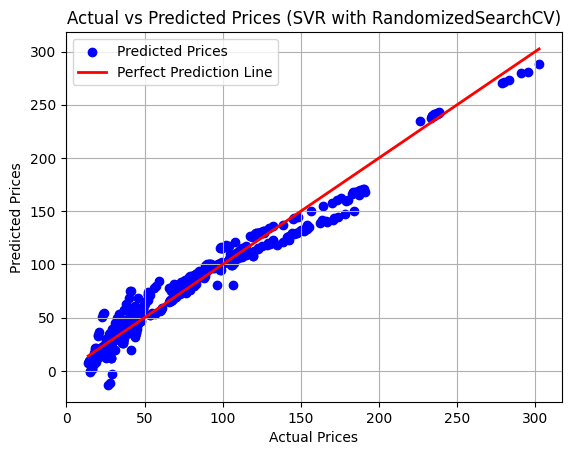

In [26]:
# Step 8: Optionally, plot the results (Actual vs Predicted)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (SVR with RandomizedSearchCV)')
plt.legend()
plt.grid(True)
plt.show()